#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [ ]:
#卷積層1

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [9]:
model.add(Dropout(rate=0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [14]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [20]:
#將編輯/筆記本設定調整成GPU後，輸入!nvidia-smi，可於最下方顯示你的GPU是甚麼
!nvidia-smi

Sun Feb 20 14:30:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    60W / 149W |    211MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Epoch 1/12
313/313 [==============================] - 17s 24ms/step - loss: 2.1400 - accuracy: 0.2102 - val_loss: 2.0341 - val_accuracy: 0.3031
Epoch 2/12
313/313 [==============================] - 7s 22ms/step - loss: 1.9089 - accuracy: 0.3162 - val_loss: 1.8881 - val_accuracy: 0.3655
Epoch 3/12
313/313 [==============================] - 7s 22ms/step - loss: 1.7775 - accuracy: 0.3678 - val_loss: 1.7866 - val_accuracy: 0.4038
Epoch 4/12
313/313 [==============================] - 7s 22ms/step - loss: 1.6814 - accuracy: 0.4024 - val_loss: 1.6929 - val_accuracy: 0.4393
Epoch 5/12
313/313 [==============================] - 7s 22ms/step - loss: 1.6115 - accuracy: 0.4231 - val_loss: 1.6289 - val_accuracy: 0.4547
Epoch 6/12
313/313 [==============================] - 7s 22ms/step - loss: 1.5509 - accuracy: 0.4443 - val_loss: 1.5779 - val_accuracy: 0.4746
Epoch 7/12
313/313 [==============================] - 7s 22ms/step - loss: 1.5063 - accuracy: 0.4623 - val_loss: 1.5362 - val_accuracy: 0.496

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

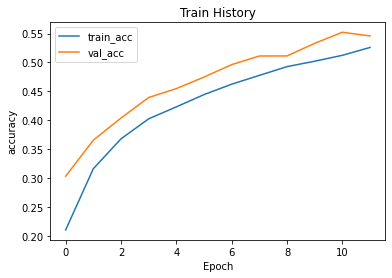

In [26]:
show_train_history('accuracy','val_accuracy')

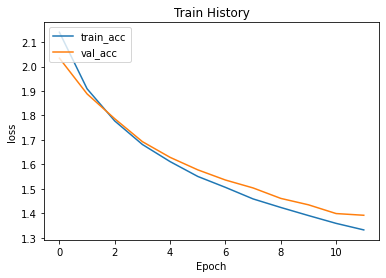

In [27]:
show_train_history('loss','val_loss')

In [28]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [29]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Epoch 1/12
313/313 [==============================] - 8s 23ms/step - loss: 0.0598 - accuracy: 0.5398 - val_loss: 0.0623 - val_accuracy: 0.5583
Epoch 2/12
313/313 [==============================] - 7s 23ms/step - loss: 0.0596 - accuracy: 0.5426 - val_loss: 0.0621 - val_accuracy: 0.5603
Epoch 3/12
313/313 [==============================] - 7s 22ms/step - loss: 0.0595 - accuracy: 0.5412 - val_loss: 0.0620 - val_accuracy: 0.5595
Epoch 4/12
313/313 [==============================] - 7s 22ms/step - loss: 0.0595 - accuracy: 0.5420 - val_loss: 0.0618 - val_accuracy: 0.5642
Epoch 5/12
313/313 [==============================] - 7s 22ms/step - loss: 0.0596 - accuracy: 0.5415 - val_loss: 0.0618 - val_accuracy: 0.5607
Epoch 6/12
313/313 [==============================] - 7s 22ms/step - loss: 0.0594 - accuracy: 0.5433 - val_loss: 0.0617 - val_accuracy: 0.5612
Epoch 7/12
313/313 [==============================] - 7s 22ms/step - loss: 0.0593 - accuracy: 0.5433 - val_loss: 0.0616 - val_accuracy: 0.5624

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

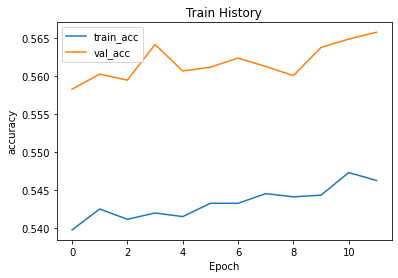

In [31]:
show_train_history('accuracy','val_accuracy')

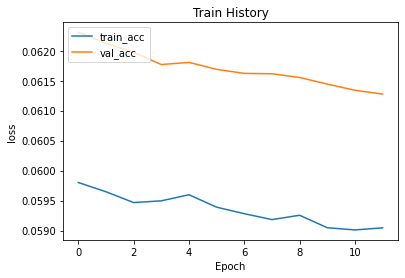

In [32]:
show_train_history('loss','val_loss')

In [33]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [34]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Epoch 1/12
313/313 [==============================] - 8s 24ms/step - loss: 0.2643 - accuracy: 0.5102 - val_loss: 0.2549 - val_accuracy: 0.5560
Epoch 2/12
313/313 [==============================] - 7s 22ms/step - loss: 0.2263 - accuracy: 0.5274 - val_loss: 0.2490 - val_accuracy: 0.5566
Epoch 3/12
313/313 [==============================] - 7s 22ms/step - loss: 0.2228 - accuracy: 0.5306 - val_loss: 0.2480 - val_accuracy: 0.5552
Epoch 4/12
313/313 [==============================] - 7s 22ms/step - loss: 0.2204 - accuracy: 0.5309 - val_loss: 0.2447 - val_accuracy: 0.5552
Epoch 5/12
313/313 [==============================] - 7s 22ms/step - loss: 0.2194 - accuracy: 0.5325 - val_loss: 0.2451 - val_accuracy: 0.5574
Epoch 6/12
313/313 [==============================] - 7s 22ms/step - loss: 0.2179 - accuracy: 0.5350 - val_loss: 0.2430 - val_accuracy: 0.5561
Epoch 7/12
313/313 [==============================] - 7s 22ms/step - loss: 0.2169 - accuracy: 0.5404 - val_loss: 0.2431 - val_accuracy: 0.5606

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

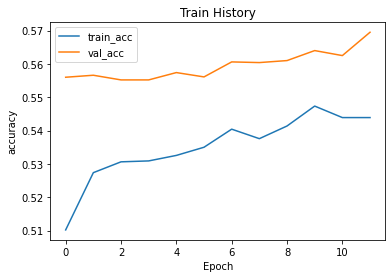

In [36]:
show_train_history('accuracy','val_accuracy')

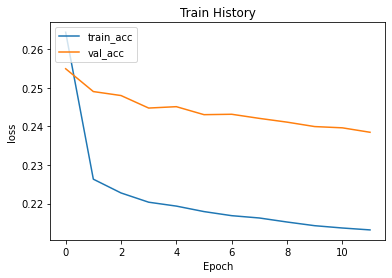

In [38]:
show_train_history('loss','val_loss')

### 評估模型準確率

In [39]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.2367 - accuracy: 0.5703

accuracy= 0.5702999830245972


#### 觀察結果: 正確率很低, 不是恰當的模型